# Jupyter Notebook to compute performance metrics from the segmentation predictions.

## Imports

In [1]:
import os
import json
from shutil import copy

# Scientific modules import
import numpy as np
from skimage import io
from skimage.transform import rescale

import matplotlib.pyplot as plt
import tensorflow as tf

# AxonDeepSeg import modules
from AxonDeepSeg.apply_model import axon_segmentation
from AxonDeepSeg.testing.segmentation_scoring import Metrics_calculator
import AxonDeepSeg.ads_utils as ads
from config import axonmyelin_suffix

%matplotlib inline

/home/groups/bzuchero/miniconda/envs/ads_venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/groups/bzuchero/miniconda/envs/ads_venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/groups/bzuchero/miniconda/envs/ads_venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/groups/

## Compute axon and myelin validation metrics on a test image


In [2]:
#Set model path
model_name = 'CNS_TEM_2021-12-01_02-28-15_ct_NAdata'
path_model = os.path.join('..','models',model_name)


# Load config file
file_config = 'config_network.json'
fname_config = os.path.join(path_model, file_config)

if os.path.exists(fname_config):
    with open(fname_config, 'r') as fd:
        config_network = json.loads(fd.read())

In [3]:
#Set test image path
path_img_dir = '/home/groups/bzuchero/axondeepseg/data/processed/cns/na/Test/hk-20-0001/'
file_img = 'image.png'
path_img = path_img_dir + file_img
print(path_img)

#Get segmentation
tf.reset_default_graph()
prediction = axon_segmentation(path_img_dir, file_img, path_model, config_network, resampled_resolutions=0.01, verbosity_level=3)

# Original image
img = ads.imread(os.path.join(path_img_dir,'image.png'))

# Groundtruth image
mask = ads.imread(os.path.join(path_img_dir,'mask.png'))
mask = ads.imread(os.path.join(path_img_dir,'mask.png'))
gt_axon = mask > 200
gt_myelin = np.logical_and(mask >= 50, mask <= 200)

# Prediction image (output of AxonDeepSeg)
pred = ads.imread(os.path.join(path_img_dir,'image' + str(axonmyelin_suffix)))
pred_axon = pred > 200
pred_myelin = np.logical_and(pred >= 50, pred <= 200)

/home/groups/bzuchero/axondeepseg/data/processed/cns/na/Test/hk-20-0001/image.png
Loading acquisitions ...


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


Rescaling acquisitions to the target resolution ...
Graph construction ...


2021-12-02 15:23:03.737290: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2021-12-02 15:23:03.742010: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2021-12-02 15:23:03.742304: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55e0625f15a0 executing computations on platform Host. Devices:
2021-12-02 15:23:03.742430: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2021-12-02 15:23:03.921609: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55e0626643f0 executing computations on platform CUDA. Devices:
2021-12-02 15:23:03.921635: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2021-12-02 15:23:03.921790: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1433] Found 

Beginning inference ...
processing patch 1 of 6
processing patch 2 of 6
processing patch 3 of 6
processing patch 4 of 6
processing patch 5 of 6
processing patch 6 of 6


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


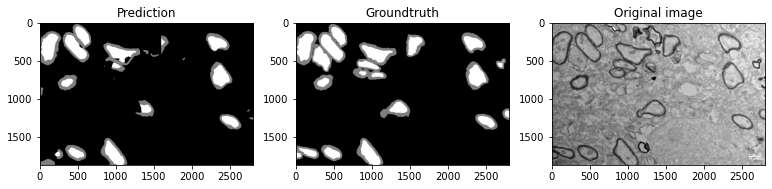

In [4]:
#Graph predicted output from model alongside the groundtruth and original images
fig, axes = plt.subplots(1,3, figsize=(13,10))
ax1, ax2, ax3 = axes[0], axes[1], axes[2]
ax1.set_title('Prediction')
ax1.imshow(pred,cmap='gray')
ax2.set_title('Groundtruth')
ax2.imshow(mask,cmap='gray')
ax3.set_title('Original image')
ax3.imshow(img, cmap = 'gray')
plt.show();

In [5]:
config_network

{'n_classes': 3,
 'thresholds': [0, 0.2, 0.8],
 'trainingset_patchsize': 512,
 'trainingset': 'TEM',
 'batch_size': 8,
 'epochs': 2000,
 'checkpoint_period': 5,
 'checkpoint': None,
 'depth': 4,
 'convolution_per_layer': [2, 2, 2, 2],
 'size_of_convolutions_per_layer': [[5, 5], [3, 3], [3, 3], [3, 3]],
 'features_per_convolution': [[[1, 16], [16, 16]],
  [[16, 32], [32, 32]],
  [[32, 64], [64, 64]],
  [[64, 128], [128, 128]]],
 'downsampling': 'convolution',
 'dropout': 0.6,
 'learning_rate': 0.001,
 'learning_rate_decay_activate': True,
 'learning_rate_decay_period': 24000,
 'learning_rate_decay_type': 'polynomial',
 'learning_rate_decay_rate': 0.9,
 'batch_norm_activate': True,
 'batch_norm_decay_decay_activate': True,
 'batch_norm_decay_starting_decay': 0.7,
 'batch_norm_decay_ending_decay': 0.9,
 'batch_norm_decay_decay_period': 16000,
 'weighted_cost-activate': True,
 'weighted_cost-balanced_activate': True,
 'weighted_cost-balanced_weights': [1.1, 1, 1.3],
 'weighted_cost-boundar

## Compute validation metrics for axon segmentation

In [6]:
# Create object to manage segmentation metrics for axon mask
axon_metrics = Metrics_calculator(pred_axon, gt_axon)

# Compute and display results (pixelwise metrics):
print('Pixelwise Sensitivity:', axon_metrics.pw_sensitivity())
print('Pixelwise Accuracy:',axon_metrics.pw_accuracy())
print('Pixelwise Dice:',axon_metrics.pw_dice())
print('Pixelwise F1 score:',axon_metrics.pw_F1_score())
print('Pixelwise False negative rate:',axon_metrics.pw_FN_rate())
print('Pixelwise False positive rate:',axon_metrics.pw_FP_rate())
print('Pixelwise Jaccard index:',axon_metrics.pw_jaccard())
print('Pixelwise Precision:',axon_metrics.pw_precision())
print('Pixelwise Specificity:',axon_metrics.pw_specificity())

axon_metrics_array = np.array([axon_metrics.pw_sensitivity(),axon_metrics.pw_specificity(),axon_metrics.pw_precision(),
     axon_metrics.pw_accuracy(), axon_metrics.pw_F1_score(), axon_metrics.pw_dice(), axon_metrics.pw_jaccard()])

# Compute and display results (elementwise metrics):
dice_output = axon_metrics.ew_dice('all')

print('Elementwise Dice:',axon_metrics.ew_dice('short'))

Pixelwise Sensitivity: 0.7076475718517268
Pixelwise Accuracy: 0.97160610761508
Pixelwise Dice: 0.8253907609657424
Pixelwise F1 score: 0.8253907609657424
Pixelwise False negative rate: 0.2923524281482732
Pixelwise False positive rate: 0.0007385888237277927
Pixelwise Jaccard index: 0.7026939117594238
Pixelwise Precision: 0.9901363422925412
Pixelwise Specificity: 0.9992614111762722
Elementwise Dice: {'mean': 0.7529793521148246, 'std': 0.32716822771159, 'min': 0.01491722757867928, 'max': 0.985852324521422, 'percent_5': 0.11287331177586168, 'percent_10': 0.22955654941608455, 'percent_25': 0.5738368798369896, 'percent_50': 0.9529297976948496, 'percent_75': 0.9758247910100812, 'percent_90': 0.9830648093570367, 'percent_95': 0.9847949976257371}


## Compute validation metrics for myelin segmentation

In [7]:
# Create object to manage segmentation metrics for myelin mask
myelin_metrics = Metrics_calculator(pred_myelin, gt_myelin)

# Compute and display results (pixelwise metrics):
print('Pixelwise Sensitivity:', myelin_metrics.pw_sensitivity())
print('Pixelwise Accuracy:',myelin_metrics.pw_accuracy())
print('Pixelwise Dice:',myelin_metrics.pw_dice())
print('Pixelwise F1 score:',myelin_metrics.pw_F1_score())
print('Pixelwise False negative rate:',myelin_metrics.pw_FN_rate())
print('Pixelwise False positive rate:',myelin_metrics.pw_FP_rate())
print('Pixelwise Jaccard index:',myelin_metrics.pw_jaccard())
print('Pixelwise Precision:',myelin_metrics.pw_precision())
print('Pixelwise Specificity:',myelin_metrics.pw_specificity())

myelin_metrics_array = np.array([myelin_metrics.pw_sensitivity(),myelin_metrics.pw_specificity(),myelin_metrics.pw_precision(),
                        myelin_metrics.pw_accuracy(), myelin_metrics.pw_F1_score(), myelin_metrics.pw_dice(), 
                        myelin_metrics.pw_jaccard()])

Pixelwise Sensitivity: 0.6609155401177305
Pixelwise Accuracy: 0.9612314711409089
Pixelwise Dice: 0.7474371501183809
Pixelwise F1 score: 0.7474371501183807
Pixelwise False negative rate: 0.33908445988226954
Pixelwise False positive rate: 0.01022419050318113
Pixelwise Jaccard index: 0.5967262642261998
Pixelwise Precision: 0.8600244568633502
Pixelwise Specificity: 0.9897758094968189


## Visualization of pixelwise metrics for both axon and myelin

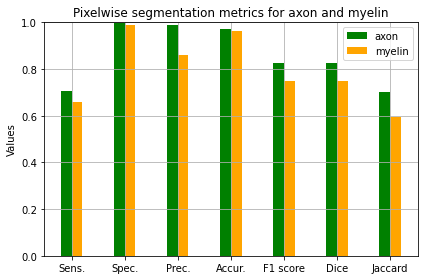

In [8]:
n_groups = 7
fig, ax = plt.subplots()
index = np.arange(n_groups)

ax.bar(index-0.1, axon_metrics_array, width=0.2, color='green',label='axon')
ax.bar(index+0.1, myelin_metrics_array, width=0.2, color='orange',label='myelin')

ax.set_ylabel('Values')
ax.set_title('Pixelwise segmentation metrics for axon and myelin')
ax.set_xticks(index)
ax.set_xticklabels(('Sens.', 'Spec.', 'Prec.', 'Accur.', 'F1 score','Dice','Jaccard'), minor=False, rotation=0)
ax.legend(loc='best')
ax.grid(True)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

## Visualization of elementwise Dice metric for axon objects

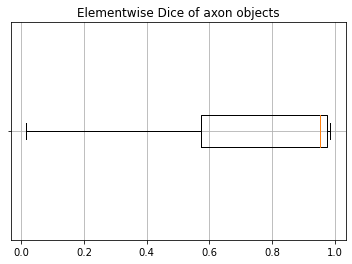

In [9]:
fig, ax = plt.subplots()
ax.boxplot(dice_output, 0, '',vert=False)
ax.set_title('Elementwise Dice of axon objects')
ax.grid(True)

# A way to remove the y labels
ax.set_yticklabels([]);
